# Numerai Auxiliary Feature EDA

---
## Load libraries

In [1]:
# libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numerapi import NumerAPI

In [2]:
# see current round
napi = NumerAPI()
current_round = napi.get_current_round()
print(f"Current round #: {current_round}")

Current round #: 314


---
## Load training data

In [3]:
# read training data
training = pd.read_parquet('data/train.parquet')
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2420521 entries, n003bba8a98662e4 to nfff2bd38e397265
Columns: 1214 entries, era to target_thomas_v4_60
dtypes: float32(1212), object(2)
memory usage: 11.0+ GB


In [4]:
# get features, targets, and eras
features = [col for col in training if col.startswith("feature")]
targets = [col for col in training if col.startswith("target_")]

print(len(features), len(targets))

1191 20


In [5]:
# see some features & targets
print(features[:3])
print(targets[:3])

['feature_honoured_observational_balaamite', 'feature_polaroid_vadose_quinze', 'feature_untidy_withdrawn_bargeman']
['target_nomi_v4_20', 'target_nomi_v4_60', 'target_jerome_v4_20']


In [6]:
# current main target
main_target = "target_nomi_v4_20"

---
# Analyze target correlations

In [7]:
# rank auxiliary targets by corr
target_corrs = training[targets].corr(method="spearman")
target_corrs = pd.DataFrame(target_corrs).drop(main_target, axis=1)

target_corrs.loc[main_target].sort_values(ascending=False)

target_thomas_v4_20     0.866518
target_william_v4_20    0.840090
target_ben_v4_20        0.819224
target_jerome_v4_20     0.793996
target_paul_v4_20       0.776213
target_george_v4_20     0.711344
target_arthur_v4_20     0.689030
target_janet_v4_20      0.677180
target_alan_v4_20       0.667567
target_nomi_v4_60       0.480506
target_thomas_v4_60     0.463494
target_william_v4_60    0.454671
target_ben_v4_60        0.444877
target_jerome_v4_60     0.432450
target_paul_v4_60       0.418384
target_george_v4_60     0.388153
target_arthur_v4_60     0.377184
target_janet_v4_60      0.374725
target_alan_v4_60       0.371352
Name: target_nomi_v4_20, dtype: float64

In [8]:
# get correlation by era
target_corrs_eras = training[["era"] + targets].groupby("era").corr(method="spearman")
target_corrs_eras = pd.DataFrame(target_corrs_eras).drop(main_target, axis=1)
target_corrs_eras = target_corrs_eras.reset_index().set_index("level_1").loc[main_target]

target_corrs_eras

,era,target_nomi_v4_60,target_jerome_v4_20,target_jerome_v4_60,target_janet_v4_20,target_janet_v4_60,target_ben_v4_20,target_ben_v4_60,target_alan_v4_20,target_alan_v4_60,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
level_1,,,,,,,,,,,,,,,,,,,,
target_nomi_v4_20,0001,0.534988,0.796844,0.466183,0.560164,0.359353,0.788230,0.474136,0.578618,0.350765,0.785202,0.472146,0.707887,0.437493,0.865420,0.506967,0.528409,0.328710,0.847355,0.504400
target_nomi_v4_20,0002,0.497659,0.820287,0.467399,0.577502,0.325536,0.772050,0.469566,0.549862,0.339252,0.819054,0.467987,0.685684,0.448643,0.870181,0.483641,0.556796,0.310431,0.787085,0.486296
target_nomi_v4_20,0003,0.517121,0.820800,0.489271,0.561269,0.352424,0.828364,0.500330,0.560850,0.337331,0.806062,0.477947,0.764442,0.479139,0.873846,0.515610,0.548611,0.320112,0.875088,0.505934
target_nomi_v4_20,0004,0.520962,0.791394,0.479000,0.570553,0.344419,0.816487,0.491844,0.534442,0.349549,0.786567,0.461739,0.748784,0.462149,0.853588,0.495553,0.553633,0.316848,0.864149,0.511893
target_nomi_v4_20,0005,0.470599,0.794678,0.443180,0.574612,0.317971,0.824769,0.451985,0.568676,0.315214,0.783011,0.437286,0.726336,0.412648,0.857800,0.473930,0.565308,0.297589,0.889033,0.464759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
target_nomi_v4_20,0570,0.393647,0.799297,0.358318,0.715619,0.340046,0.839704,0.374506,0.705378,0.325356,0.780335,0.355665,0.727329,0.292843,0.850714,0.382902,0.726457,0.338534,0.894795,0.393852
target_nomi_v4_20,0571,0.383363,0.802082,0.351380,0.704928,0.313570,0.820680,0.358612,0.691340,0.317947,0.780086,0.341256,0.704251,0.276534,0.860731,0.371125,0.724774,0.318297,0.874792,0.369878
target_nomi_v4_20,0572,0.443860,0.787472,0.392057,0.688957,0.339320,0.807402,0.409600,0.678860,0.355973,0.762847,0.374610,0.618750,0.333002,0.844805,0.401760,0.706775,0.343751,0.848852,0.427571


In [9]:
# descirbe overall stats
target_corr_stats = target_corrs_eras.describe().T.sort_values("mean", ascending=False)
target_corr_stats

,count,mean,std,min,25%,50%,75%,max
target_thomas_v4_20,574.0,0.865794,0.040179,0.655347,0.849306,0.875445,0.893561,0.929296
target_william_v4_20,574.0,0.839922,0.026763,0.689314,0.825659,0.843806,0.859813,0.889959
target_ben_v4_20,574.0,0.817912,0.033170,0.647807,0.804645,0.824608,0.839089,0.880617
target_jerome_v4_20,574.0,0.793144,0.026400,0.665971,0.777790,0.795954,0.812403,0.848033
target_paul_v4_20,574.0,0.775342,0.029460,0.630626,0.758011,0.779961,0.795754,0.834274
target_george_v4_20,574.0,0.708849,0.064501,0.366789,0.682275,0.720393,0.751509,0.826836
target_arthur_v4_20,574.0,0.684764,0.035662,0.528409,0.670830,0.692675,0.707659,0.776365
target_janet_v4_20,574.0,0.673734,0.030526,0.560164,0.659204,0.680656,0.694667,0.751228
target_alan_v4_20,574.0,0.663745,0.035571,0.534442,0.648899,0.671237,0.687331,0.782595
target_nomi_v4_60,574.0,0.480205,0.049317,0.298949,0.445684,0.478766,0.515180,0.609496


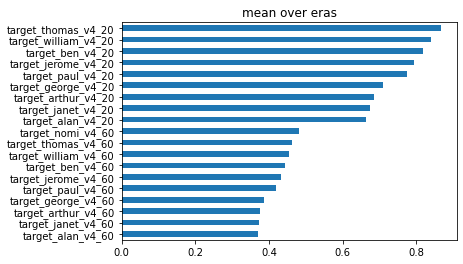

In [10]:
# plot mean
target_corr_stats["mean"].sort_values(ascending=True).plot.barh(title="mean over eras")
plt.show()

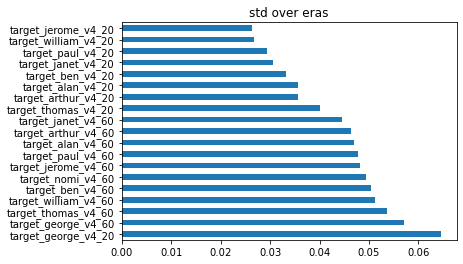

In [11]:
# plot std
target_corr_stats["std"].sort_values(ascending=False).plot.barh(title="std over eras")
plt.show()

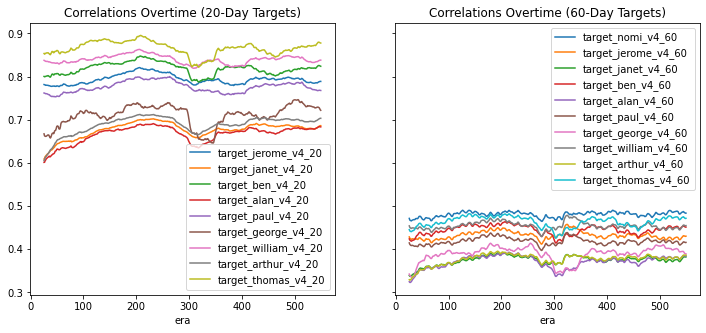

In [12]:
# plot corr over time
targets_20s = [col for col in target_corrs_eras if col.endswith("_20")]
targets_60s = [col for col in target_corrs_eras if col.endswith("_60")]
ROLLING_FACTOR = 50

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 5))
target_corrs_eras[["era"] + targets_20s].rolling(ROLLING_FACTOR).mean().plot(x="era", ax=axes[0])
target_corrs_eras[["era"] + targets_60s].rolling(ROLLING_FACTOR).mean().plot(x="era", ax=axes[1])
axes[0].set_title("Correlations Overtime (20-Day Targets)")
axes[1].set_title("Correlations Overtime (60-Day Targets)")
plt.show()

---
# Analyze averaging auxiliary targets to main target

In [28]:
# averageing 20s auxiliary targets
targets_20s_ranked = training[targets_20s].fillna(0.5).mean(axis=1).rank(pct=True, method="first")
np.corrcoef(training[main_target].fillna(0.5), targets_20s_ranked)[0, 1]

0.8489364406681266

In [29]:
# averageing 60s auxiliary targets
targets_60s_ranked = training[targets_60s].fillna(0.5).mean(axis=1).rank(pct=True, method="first")
np.corrcoef(training[main_target].fillna(0.5), targets_60s_ranked)[0, 1]

0.4818928411715623

---
# Analyze predictive power of auxiliary targets

In [30]:
# create model
from lightgbm import LGBMRegressor

params = {
    "n_estimators": 1000,
    "learning_rate": 0.01,
    "max_depth": 5,
    "num_leaves": 2 ** 5,
    "colsample_bytree": 0.1,
    "verbosity": 0
    }

model = LGBMRegressor(**params)

In [31]:
# fit model
model.fit(
    training[targets_20s],
    training[main_target]
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=1000, num_leaves=32, verbosity=0)

In [32]:
# load validation data
validation = pd.read_parquet('data/validation.parquet')
validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2203644 entries, n000101811a8a843 to nffee39b828d1e10
Columns: 1214 entries, era to target_thomas_v4_60
dtypes: float32(1212), object(2)
memory usage: 10.0+ GB


In [33]:
# predict on validation data
preds = pd.DataFrame(model.predict(validation[targets_20s]))
preds_ranked = preds.rank(pct=True, method="first")

In [34]:
# check spearman corr
np.corrcoef(validation[main_target].fillna(0.5), preds_ranked[0])[0, 1]

0.8475056546358207